## 2.1) 나무위키 최신 변경 문서의 키워드 분석
 - <Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기
    * [BeautifulSoup을 이용한 웹 크롤링]
    * [나무위키 최근변경 데이터 크롤링]

 - <Step2. 추출> : 키워드 추출
    * [텍스트 데이터 전처리]
 * [말뭉치 만들기]
*[konlpy를 이용한 키워드 추출]
*[키워드 가다듬기]
 - <Step3. 시각화> : 워드 클라우드 시각화
*[pytagcloud 사용하기]
*[나무위키 키워드 시각화]

# <Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기

##### 페이지 리스트 가져오기

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

executable_path='chromedriver.exe'

source_url='https://thewiki.kr/Recent'

driver=webdriver.Chrome(executable_path=executable_path)
driver.get(source_url)
req=driver.page_source
soup=BeautifulSoup(req, 'html.parser')
contents_table=soup.find(name='table')
table_body=contents_table.find(name='tbody')
table_rows=table_body.find_all(name='tr')

C:\Users\wjaud\AppData\Local\Temp\ipykernel_17528\3277188168.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(executable_path=executable_path)


In [2]:
page_url_base='https://thewiki.kr'
page_urls=[]

for index in range(0, len(table_rows)):
    first_td=table_rows[index].find_all('td')[0]
    td_url=first_td.find_all('a')
    if len(td_url)>0:
        page_url=page_url_base+td_url[1].get('href')
        if 'png' or 'jpg' not in page_url:
            page_urls.append(page_url)
            
page_urls=list(set(page_urls))

for page in page_urls:
    print(page)

https://thewiki.kr/w/%EA%B9%80%ED%9D%AC%EC%A7%84%28%EA%B0%80%EC%88%98%29
https://thewiki.kr/w/%EC%84%9C%EC%9A%B8%EA%B5%90%ED%86%B5%EA%B3%B5%EC%82%AC%208000%ED%98%B8%EB%8C%80%20%EC%A0%84%EB%8F%99%EC%B0%A8%2F%ED%98%84%ED%99%A9
https://thewiki.kr/w/%EB%8F%85%EC%88%98%EB%A6%AC%20%EC%9A%94%EC%83%88
https://thewiki.kr/w/%EB%A7%A8%EB%AA%B8%20%EC%99%80%EC%9D%B4%EC%85%94%EC%B8%A0
https://thewiki.kr/w/%EC%84%9C%EC%9A%B8%EA%B5%90%ED%86%B5%EA%B3%B5%EC%82%AC%204000%ED%98%B8%EB%8C%80%20VVVF%20%EC%A0%84%EB%8F%99%EC%B0%A8%2F%ED%98%84%ED%99%A9
https://thewiki.kr/w/Apple%20Pencil
https://thewiki.kr/w/Windows%20XP%2F%EA%B0%9C%EB%B0%9C
https://thewiki.kr/w/%EC%A0%9C%ED%8A%B8%20%EC%97%B4%EC%B0%A8
https://thewiki.kr/w/%EC%84%B1%EC%9A%A9
https://thewiki.kr/w/%EA%B0%81%EC%84%A0%EB%AF%B8
https://thewiki.kr/w/%EC%84%9C%EC%9A%B8%EA%B5%90%ED%86%B5%EA%B3%B5%EC%82%AC%205000%ED%98%B8%EB%8C%80%20%EC%A0%84%EB%8F%99%EC%B0%A8
https://thewiki.kr/w/%EC%A0%9C126%EB%B3%B4%EB%B3%91%EC%97%AC%EB%8B%A8
https://thewiki.kr/w/%EC%

##### 페이지내 텍스트 구조 확인

In [3]:
driver.get(page_urls[0])
req = driver.page_source
soup = BeautifulSoup(req, 'html.parser')
contents_table = soup.find(name="article")
title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-inner-content"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)


김희진(가수) 


 한국포크 30주년 기념 콘서트 - 세종문화회관  포크5인5색 낭만 콘서트 전국투어(김도향,유익종,추가열,남궁옥분,김희진) 제헌 70주년 기념 음악회 '대중음악으로 돌아본 헌정사 70주년' 출연 - 국회의사당 김희진 꽃 콘서트 순회 공연 - 서울 부산 대구  티시 이노호사(Tish Hinojosa)[1] 티시 이노호사(1955년 12월 6일~)는 멕시코계 미국인 여성 가수이다. 대표곡으로는 돈데보이 Donde Voy가 있다와 듀엣 공연 테너 류정필과 성악가와 포크가수의 컬래버레이션 콘서트 연속 개최



 김희진Kim Hee-jin   출생 제주특별자치도 제주시 학력 전주대학교 (연극영화학과 / 학사)단국대학교 대학원 (공연예술학과 / 석사) 수상 2012년 제19회 대한민국 연예예술상 여자포크싱어상2022년 제28회 대한민국 연예예술상 여자포크싱어상 신체 167cm 데뷔 2000년 그룹 '라나에로스포 - 사랑은' 소속사 제이제이엔터테인먼트 관련활동 대한가수협회 이사 SNS    1. 개요2. 생애 및 활동3. 주요 공연4. 뮤지컬5. 방송6. 주요 경력7. 앨범8. 대표곡9. 관련 활동10. 테너 류정필과 공동 활동10.1. 음반10.2. 공연10.3. 방송11. 관련 링크1. 개요[편집]김희진은 대한민국의 포크가수이다.2. 생애 및 활동[편집]가수 김희진은 제주특별자치도 제주시에서 태어났으며, 전주대학교 연극영화학과 학사 과정, 단국대학교 대학원 공연예술학과 석사 과정을 졸업했다.2000년에 그룹 '라니에로스포'에서 '사랑은'이라는 곡을 발표해 가수로 데뷔하게 되었다. 2003년 솔로가수로 전향하여 1집 앨범을 발표하였고 이후에도 많은 음반과 곡을 발표하며 중견 가수로서 활동을 계속하고 있다.2012년과 2022년에 대한민국 연예예술상 여자 포크싱어상을 수상하였으며, 제주도로부터 '제주를 빛낸 예술인'에 선정되었다. 2021년 대한가수협회 이사로 선출되었다.3. 주요 공연[편집] 한국포크 30주년 기념 콘서트 - 세종문화회관  포크5인

### [나무위키 최근변경 데이터 크롤링]

In [5]:
columns=['title', 'category', 'content_text']
df=pd.DataFrame(columns=columns)

for page_url in page_urls:
    driver.get(page_url)
    req=driver.page_source
    soup=BeautifulSoup(req, 'html.parser')
    contents_table=soup.find(name='article')
    title=contents_table.find_all('h1')[0]
    
    if len(contents_table.find_all('ul'))>0:
        category=contents_table.find_all('ul')[0]
    else:
        category=None
    
    content_paragraphs=contents_table.find_all(name='div', attrs={'class':'wiki-inner-content'})
    content_corpus_list=[]
    
    if title is not None:
        row_title=title.text.replace('\n', '')
    else:
        row_title=''
    if content_paragraphs is not None:
        for paragrphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace('\n', ''))
            else:
                content_corpus_list.append('')
    else:
        content_corpus_list.append('')

    if category is not None:
        row_category=category.text.replace('\n', '')
    else:
        row_category=''
    
    row=[row_title, row_category, ''.join(content_corpus_list)]
    series=pd.Series(row, index=df.columns)
    df=df.append(series, ignore_index=True)
    
driver.close

C:\Users\wjaud\AppData\Local\Temp\ipykernel_17528\264941416.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(series, ignore_index=True)
C:\Users\wjaud\AppData\Local\Temp\ipykernel_17528\264941416.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(series, ignore_index=True)
C:\Users\wjaud\AppData\Local\Temp\ipykernel_17528\264941416.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(series, ignore_index=True)
C:\Users\wjaud\AppData\Local\Temp\ipykernel_17528\264941416.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(series, ignore_index=True)
C:\Users\wjaud\AppData\Local\Tem

<bound method WebDriver.close of <selenium.webdriver.chrome.webdriver.WebDriver (session="9369ff46482a26fcad5f8b9cd97f0575")>>

In [6]:
df

,title,category,content_text
0,김희진(가수),한국포크 30주년 기념 콘서트 - 세종문화회관 포크5인5색 낭만 콘서트 전국투어...,김희진Kim Hee-jin 출생 제주특별자치도 제주시 학력 전주대학교 (연극영...
1,서울교통공사 8000호대 전동차/현황,"한국의 철도 환경 연결선로 서울 지하철 8호선 전기 기관차 8100, 8200호대 ...",김희진Kim Hee-jin 출생 제주특별자치도 제주시 학력 전주대학교 (연극영...
2,독수리 요새,일본의 도쿄 서머랜드에도 이와 비슷한 컨셉의 롤러코스터인 하야부사가 있다.#[5]...,김희진Kim Hee-jin 출생 제주특별자치도 제주시 학력 전주대학교 (연극영...
3,맨몸 와이셔츠,대상이 맨발인 상황[필수] 사실상 필수다. 대상이 맨다리인 상황[필수] 사실상 필...,김희진Kim Hee-jin 출생 제주특별자치도 제주시 학력 전주대학교 (연극영...
4,서울교통공사 4000호대 VVVF 전동차/현황,대한민국의 철도차량 수도권 전철 4호선,김희진Kim Hee-jin 출생 제주특별자치도 제주시 학력 전주대학교 (연극영...
5,Apple Pencil,Apple의 하드웨어 스마트 디바이스 액세서리 스타일러스 펜,김희진Kim Hee-jin 출생 제주특별자치도 제주시 학력 전주대학교 (연극영...
6,Windows XP/개발,Windows,김희진Kim Hee-jin 출생 제주특별자치도 제주시 학력 전주대학교 (연극영...
7,제트 열차,당시 스테이션이 애매한 곳에 위치하고 있어 바로 찾아가기 힘들었다. 대한민국에서 ...,김희진Kim Hee-jin 출생 제주특별자치도 제주시 학력 전주대학교 (연극영...
8,성용,"그 외에도 ""너 인사 똑바로 안 하냐?"", ""쌍노루새X"", ""고마훼이!"", ""너 ...",김희진Kim Hee-jin 출생 제주특별자치도 제주시 학력 전주대학교 (연극영...
9,각선미,대상이 입은 상의나 원피스가 긴팔인 상황[필수] 사실상 필수다.[5] 소매가 모에...,김희진Kim Hee-jin 출생 제주특별자치도 제주시 학력 전주대학교 (연극영...


# <Step2. 추출> : 키워드 추출

### [텍스트 데이터 전처리]

In [7]:
def text_cleanning(text):
    hangul=re.compile('[^ㄱ-ㅣ 가-힣]+')
    result=hangul.sub('', text)
    return result

In [8]:
print(text_cleanning(df['content_text'][1]))

 김희진    출생 제주특별자치도 제주시 학력 전주대학교 연극영화학과  학사단국대학교 대학원 공연예술학과  석사 수상 년 제회 대한민국 연예예술상 여자포크싱어상년 제회 대한민국 연예예술상 여자포크싱어상 신체  데뷔 년 그룹 라나에로스포  사랑은 소속사 제이제이엔터테인먼트 관련활동 대한가수협회 이사      개요 생애 및 활동 주요 공연 뮤지컬 방송 주요 경력 앨범 대표곡 관련 활동 테너 류정필과 공동 활동 음반 공연 방송 관련 링크 개요편집김희진은 대한민국의 포크가수이다 생애 및 활동편집가수 김희진은 제주특별자치도 제주시에서 태어났으며 전주대학교 연극영화학과 학사 과정 단국대학교 대학원 공연예술학과 석사 과정을 졸업했다년에 그룹 라니에로스포에서 사랑은이라는 곡을 발표해 가수로 데뷔하게 되었다 년 솔로가수로 전향하여 집 앨범을 발표하였고 이후에도 많은 음반과 곡을 발표하며 중견 가수로서 활동을 계속하고 있다년과 년에 대한민국 연예예술상 여자 포크싱어상을 수상하였으며 제주도로부터 제주를 빛낸 예술인에 선정되었다 년 대한가수협회 이사로 선출되었다 주요 공연편집 한국포크 주년 기념 콘서트  세종문화회관  포크인색 낭만 콘서트 전국투어김도향유익종추가열남궁옥분김희진 제헌 주년 기념 음악회 대중음악으로 돌아본 헌정사 주년 출연  국회의사당 김희진 꽃 콘서트 순회 공연  서울 부산 대구  티시 이노호사  티시 이노호사년 월 일는 멕시코계 미국인 여성 가수이다 대표곡으로는 돈데보이  가 있다와 듀엣 공연 테너 류정필과 성악가와 포크가수의 컬래버레이션 콘서트 연속 개최     뮤지컬편집  국악 관현악단 뮤지컬 심청이  국악 관현악단 뮤지컬 삼신할머니와 일곱 아이들 뮤지컬 여고시절 뮤지컬 이수일과 심순애 뮤지컬 애랑과 배비장전 뮤지컬 기적을 파는 사람들 방송편집   콘서트  주 출연자   가요무대 주 출연자  라디오 강원래의 노래선물 고정 출연   아침마당   에서  부터 방송하는 아침 프로그램이다홍보 영상 출연  러브 최백호의 낭만시대 고정 출연  불교방송  최고의 하루 고정 

In [14]:
df['title']=df['title'].apply(lambda x: text_cleanning(x))
df['category']=df['category'].apply(lambda x: text_cleanning(x))
df['content_text']=df['content_text'].apply(lambda x: text_cleanning(x))
df

,title,category,content_text
0,김희진가수,한국포크 주년 기념 콘서트 세종문화회관 포크인색 낭만 콘서트 전국투어김도향유익...,김희진 출생 제주특별자치도 제주시 학력 전주대학교 연극영화학과 학사단국대학...
1,서울교통공사 호대 전동차현황,한국의 철도 환경 연결선로 서울 지하철 호선 전기 기관차 호대 전기기관차,김희진 출생 제주특별자치도 제주시 학력 전주대학교 연극영화학과 학사단국대학...
2,독수리 요새,일본의 도쿄 서머랜드에도 이와 비슷한 컨셉의 롤러코스터인 하야부사가 있다 하야부사...,김희진 출생 제주특별자치도 제주시 학력 전주대학교 연극영화학과 학사단국대학...
3,맨몸 와이셔츠,대상이 맨발인 상황필수 사실상 필수다 대상이 맨다리인 상황필수 사실상 필수다 대상...,김희진 출생 제주특별자치도 제주시 학력 전주대학교 연극영화학과 학사단국대학...
4,서울교통공사 호대 전동차현황,대한민국의 철도차량 수도권 전철 호선,김희진 출생 제주특별자치도 제주시 학력 전주대학교 연극영화학과 학사단국대학...
5,,의 하드웨어 스마트 디바이스 액세서리 스타일러스 펜,김희진 출생 제주특별자치도 제주시 학력 전주대학교 연극영화학과 학사단국대학...
6,개발,,김희진 출생 제주특별자치도 제주시 학력 전주대학교 연극영화학과 학사단국대학...
7,제트 열차,당시 스테이션이 애매한 곳에 위치하고 있어 바로 찾아가기 힘들었다 대한민국에서 두...,김희진 출생 제주특별자치도 제주시 학력 전주대학교 연극영화학과 학사단국대학...
8,성용,그 외에도 너 인사 똑바로 안 하냐 쌍노루새 고마훼이 너 뭐라 그래쒀 또는 말투를...,김희진 출생 제주특별자치도 제주시 학력 전주대학교 연극영화학과 학사단국대학...
9,각선미,대상이 입은 상의나 원피스가 긴팔인 상황필수 사실상 필수다 소매가 모에 소매라면 ...,김희진 출생 제주특별자치도 제주시 학력 전주대학교 연극영화학과 학사단국대학...


### [말뭉치 만들기]

In [15]:
title_corpus=''.join(df['title'].tolist())
category_corpus=''.join(df['category'].tolist())
content_corpus=''.join(df['content_text'].tolist())
print(title_corpus)

김희진가수 서울교통공사 호대 전동차현황 독수리 요새 맨몸 와이셔츠 서울교통공사 호대  전동차현황    개발 제트 열차 성용 각선미 서울교통공사 호대 전동차 제보병여단 이미지 서울교통공사 호대 전동차현황 지구마을 뮤직가든 에버랜드시설 총야 판묻지마 육남매 이미지  우주관람차 하의실종 패션 서울교통공사 호대 전동차현황 


### [konlpy를 이용한 키워드 추출]

In [16]:
!pip install konlpy

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
- 아래의 방법으로 설치해도 실행되지 않는다면, http://konlpy.org/ko/latest/install/ 를 참고하세요.
    - Install
        - 1. Java를 설치합니다. (https://java.com/ko/download/)
        - 2. c++ 컴파일러를 설치합니다. 
            - 윈도우 : `Microsoft Visual C++ 14.0` 설치 권장, https://visualstudio.microsoft.com/ko/downloads/
            - Mac OS : `Xcode` 설치 권장
            - Linux : `gcc` 설치 권장
        - 3. konlpy 파이썬 패키지를 설치합니다. 최신 버전으로 설치합니다 (2021.06.04 기준, 0.5.2)
            - (env_name) `pip install konlpy`
        - 4. 만약 설치가 잘 되지 않을 시, 아래와 같이 파이썬 패키지를 설치합니다. **konlpy 버전을 0.5.1로 해주어야 합니다. 최신 버전 konlpy 에서는 일부 개발환경에서 자바 에러가 발생할 수 있습니다.**
            - (env_name) `pip install konlpy==0.5.1`
            - (env_name) `pip install jpype1`
            - (env_name) `pip install Jpype1-py3`

In [17]:
from konlpy.tag import Okt
from collections import Counter

nouns_tagger=Okt()
nouns=nouns_tagger.nouns(content_corpus)
count=Counter(nouns)

In [18]:
count

Counter({'김희진': 230,
         '출생': 46,
         '제주': 276,
         '특별자치도': 46,
         '제주시': 69,
         '학력': 23,
         '전주대학교': 69,
         '극영화': 46,
         '학과': 92,
         '학사': 46,
         '단국대학교': 69,
         '대학원': 46,
         '공연예술': 46,
         '석사': 46,
         '수상': 23,
         '년': 1311,
         '회': 92,
         '대한민국': 138,
         '연예': 115,
         '예술상': 115,
         '여자': 115,
         '포크': 207,
         '싱어': 138,
         '신체': 23,
         '데뷔': 92,
         '그룹': 46,
         '라나': 115,
         '스포': 115,
         '사랑': 299,
         '소속사': 23,
         '제이제이': 23,
         '엔터테인먼트': 23,
         '관련': 138,
         '활동': 230,
         '가수': 345,
         '협회': 92,
         '이사': 92,
         '개요': 46,
         '생애': 46,
         '및': 46,
         '주요': 92,
         '공연': 207,
         '뮤지컬': 184,
         '방송': 207,
         '경력': 46,
         '앨범': 161,
         '대표': 92,
         '곡': 253,
         '테너': 92,
         '류정': 207,
      

### [키워드 가다듬기]

##### 한글자 키워드 제거

In [19]:
remove_char_counter=Counter({x : count[x] for x in count if len(x)>1})
print(remove_char_counter)

Counter({'가수': 345, '편집': 322, '사랑': 299, '싱글': 299, '제주': 276, '김희진': 230, '활동': 230, '포크': 207, '공연': 207, '방송': 207, '류정': 207, '뮤지컬': 184, '음반': 184, '앨범': 161, '발표': 161, '콘서트': 161, '대한민국': 138, '싱어': 138, '관련': 138, '출연': 138, '연예': 115, '예술상': 115, '여자': 115, '라나': 115, '스포': 115, '카드': 115, '이야기': 115, '연가': 115, '베스트': 115, '학과': 92, '데뷔': 92, '협회': 92, '이사': 92, '주요': 92, '대표': 92, '테너': 92, '공동': 92, '부산': 92, '듀엣': 92, '인천': 92, '당신': 92, '가요': 92, '출신': 92, '제주시': 69, '전주대학교': 69, '단국대학교': 69, '계속': 69, '예술인': 69, '선정': 69, '한국': 69, '주년': 69, '기념': 69, '티시': 69, '이노': 69, '호사': 69, '사람': 69, '고정': 69, '홍보': 69, '진행자': 69, '여수': 69, '우리': 69, '어멍': 69, '한국인': 69, '골든': 69, '차차차': 69, '출생': 46, '특별자치도': 46, '극영화': 46, '학사': 46, '대학원': 46, '공연예술': 46, '석사': 46, '그룹': 46, '개요': 46, '생애': 46, '경력': 46, '링크': 46, '과정': 46, '다년': 46, '솔로': 46, '선출': 46, '문화': 46, '낭만': 46, '유익': 46, '추가열': 46, '멕시코': 46, '미국인': 46, '여성': 46, '돈데': 46, '보이': 46, '성악가': 46, '컬래버레이션': 46, '국악': 46

##### 불용어 제거

In [21]:
korean_stopwords_path='korean_stopwords.txt'

with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords=f.readlines()
    
stopwords=[x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [22]:
namu_wiki_stopwords=['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '이름', '년월']

for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

In [23]:
remove_char_counter=Counter({x: remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'가수': 345, '사랑': 299, '싱글': 299, '제주': 276, '김희진': 230, '활동': 230, '포크': 207, '공연': 207, '방송': 207, '류정': 207, '뮤지컬': 184, '음반': 184, '앨범': 161, '발표': 161, '콘서트': 161, '대한민국': 138, '싱어': 138, '관련': 138, '출연': 138, '연예': 115, '예술상': 115, '여자': 115, '라나': 115, '스포': 115, '카드': 115, '이야기': 115, '연가': 115, '베스트': 115, '학과': 92, '데뷔': 92, '협회': 92, '이사': 92, '주요': 92, '대표': 92, '테너': 92, '공동': 92, '부산': 92, '듀엣': 92, '인천': 92, '가요': 92, '출신': 92, '제주시': 69, '전주대학교': 69, '단국대학교': 69, '계속': 69, '예술인': 69, '선정': 69, '한국': 69, '주년': 69, '기념': 69, '티시': 69, '이노': 69, '호사': 69, '사람': 69, '고정': 69, '홍보': 69, '진행자': 69, '여수': 69, '어멍': 69, '한국인': 69, '골든': 69, '차차차': 69, '출생': 46, '특별자치도': 46, '극영화': 46, '학사': 46, '대학원': 46, '공연예술': 46, '석사': 46, '그룹': 46, '개요': 46, '생애': 46, '경력': 46, '링크': 46, '과정': 46, '다년': 46, '솔로': 46, '선출': 46, '문화': 46, '낭만': 46, '유익': 46, '추가열': 46, '멕시코': 46, '미국인': 46, '여성': 46, '돈데': 46, '보이': 46, '성악가': 46, '컬래버레이션': 46, '국악': 46, '관현악단': 46, '출연자': 46, '아침마당'

# <Step3. 시각화> : 워드 클라우드 시각화

### [나무위키 키워드 시각화]

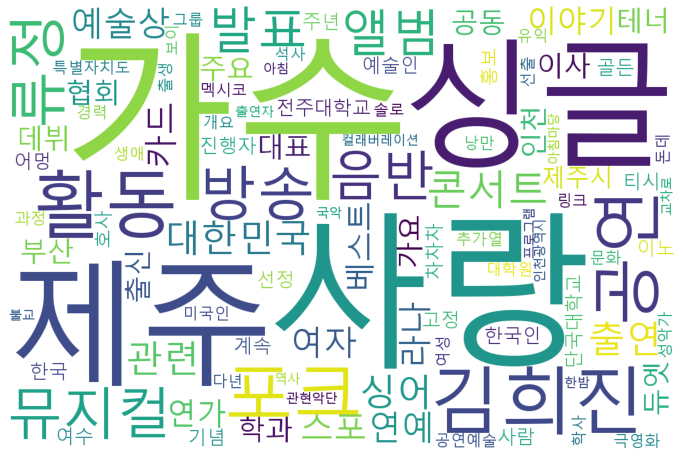

In [24]:
import random
from wordcloud import WordCloud

ranked_tags=remove_char_counter.most_common(100)

wordcloud = WordCloud(font_path = 'c:\Windows\Fonts\malgun.ttf',background_color = 'white', width = 1200, height = 800).generate_from_frequencies( dict(ranked_tags))
fig=plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

##### 제목 키워드

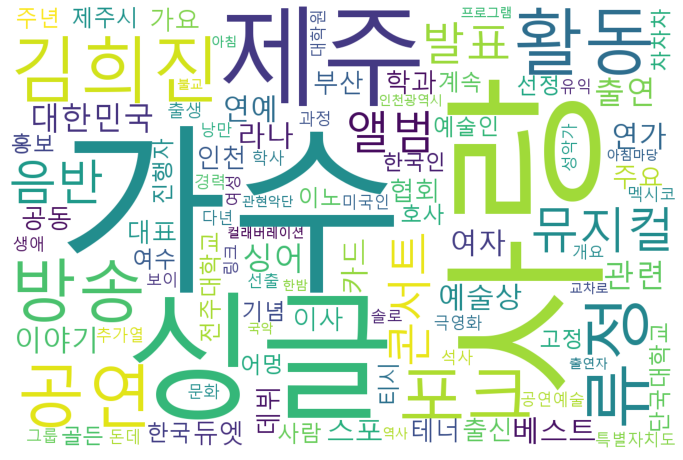

In [25]:
nouns_tagger=Okt()
nouns=nouns_tagger.nouns(title_corpus)
count=Counter(nouns)

remove_char_counter=Counter({x: count[x] for x in count if len(x)>1})
remove_char_counter=Counter({x: remove_char_counter[x] for x in count if x not in stopwords})

ranked_tage=remove_char_counter.most_common(100)

wordcloud = WordCloud(font_path = 'c:\Windows\Fonts\malgun.ttf',background_color = 'white', width = 1200, height = 800).generate_from_frequencies( dict(ranked_tags) )
fig = plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow( wordcloud )
plt.show()

##### 카테고리 키워드

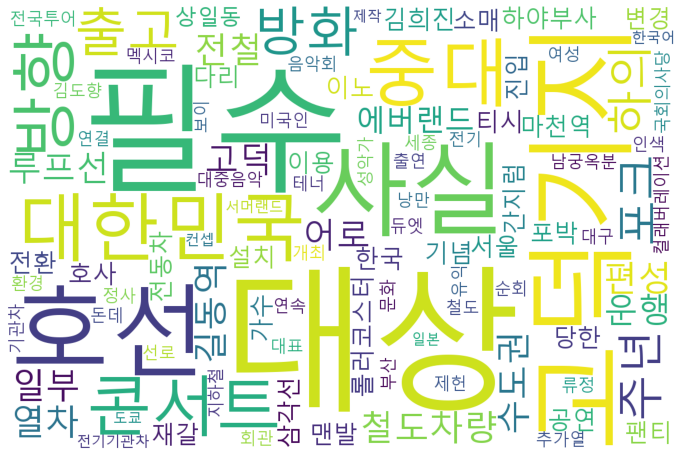

In [26]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(category_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(100)
wordcloud = WordCloud(font_path = 'c:\Windows\Fonts\malgun.ttf',background_color = 'white', width = 1200, height = 800).generate_from_frequencies( dict(ranked_tags) )
fig = plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow( wordcloud )
plt.show()
